In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [84]:
df1 = pd.read_csv('/content/drive/MyDrive/Bts usd/BTC-USD Training Data - 1st Jan 2016 to 1st Jan 2022.csv')                    
df1.head()  

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [85]:
df2 = pd.read_csv('/content/drive/MyDrive/Bts usd/BTC-USD Out of Time Testing 1st Jan 2022 to 4th Feb 2022.csv')
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
1,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188,46458.117188,33071628362
3,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
4,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859


In [86]:
final_df = pd.concat([df1, df2], ignore_index=True)  

In [87]:
#Now save the Dataframe into the Final preprocessed_data file.
final_df.to_csv("/content/drive/MyDrive/Bts usd/final_df.csv")

In [88]:
final_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [89]:
final_df.shape

(2228, 7)

In [90]:
final_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2.228000e+03
mean,13445.026206,13806.843200,13043.509117,13460.158516,13460.158516,1.774999e+10
std,16721.478048,17170.695832,16198.653157,16723.528378,16723.528378,2.079395e+10
min,365.072998,374.950012,354.914001,364.330994,364.330994,2.851400e+07
25%,2676.954956,2763.644959,2576.104980,2670.775024,2670.775024,1.234932e+09
50%,7468.564941,7637.985108,7324.726075,7476.364991,7476.364991,9.833027e+09
75%,11557.909180,11880.472656,11290.747070,11586.823242,11586.823242,2.898932e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [91]:
#Checking whether there are any rows with null values
nan_rows = final_df[final_df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


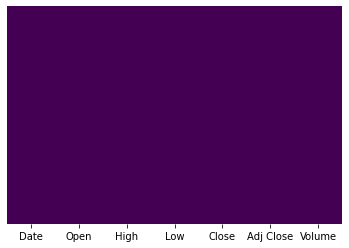

In [92]:
sns.heatmap(final_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [93]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2228 entries, 0 to 2227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2228 non-null   object 
 1   Open       2228 non-null   float64
 2   High       2228 non-null   float64
 3   Low        2228 non-null   float64
 4   Close      2228 non-null   float64
 5   Adj Close  2228 non-null   float64
 6   Volume     2228 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 122.0+ KB


In [94]:
final_df['Date'] = pd.to_datetime(final_df['Date'])
final_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [96]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2228 entries, 0 to 2227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2228 non-null   datetime64[ns]
 1   Open       2228 non-null   float64       
 2   High       2228 non-null   float64       
 3   Low        2228 non-null   float64       
 4   Close      2228 non-null   float64       
 5   Adj Close  2228 non-null   float64       
 6   Volume     2228 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 122.0 KB


In [97]:
final_df['Open'].value_counts()

46311.746094    2
17760.300781    2
9292.841797     1
9344.683594     1
9389.820313     1
               ..
16476.199219    1
17527.300781    1
17462.099609    1
15477.200195    1
37234.058594    1
Name: Open, Length: 2226, dtype: int64

In [98]:
final_df['Close'].value_counts()

47686.812500    2
6741.750000     2
1179.969971     2
9358.589844     1
8406.515625     1
               ..
16477.599609    1
17527.000000    1
17429.500000    1
15599.200195    1
37649.335938    1
Name: Close, Length: 2225, dtype: int64

In [99]:
final_df['High'].value_counts()

47827.312500    2
6536.919922     2
8745.590820     1
8792.994141     1
8687.747070     1
               ..
17712.400391    1
17705.199219    1
15739.700195    1
15572.799805    1
38121.738281    1
Name: High, Length: 2226, dtype: int64

In [100]:
# Selecting duplicate rows except first 
# occurrence based on all columns
duplicate = final_df[final_df.duplicated()]
  
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Date,Open,High,Low,Close,Adj Close,Volume
2193,2022-01-01,46311.746094,47827.3125,46288.484375,47686.8125,47686.8125,24582667004


In [101]:
final_df = final_df.drop_duplicates()

In [102]:
final_df.shape

(2227, 7)

In [103]:
import warnings
warnings.filterwarnings("ignore")

Plotting distribution of variable:

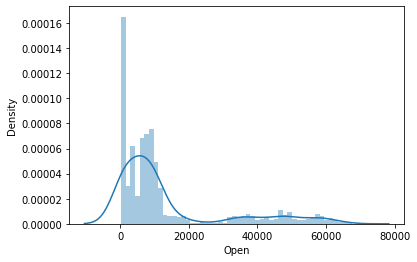

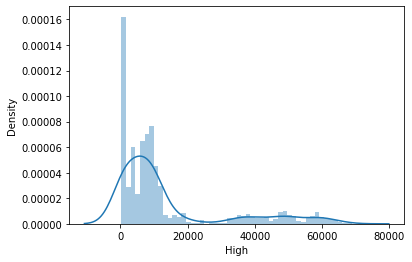

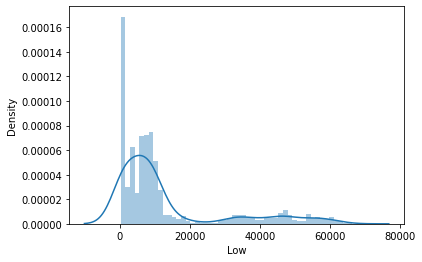

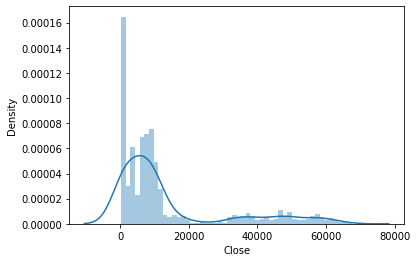

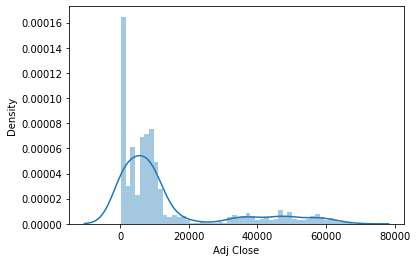

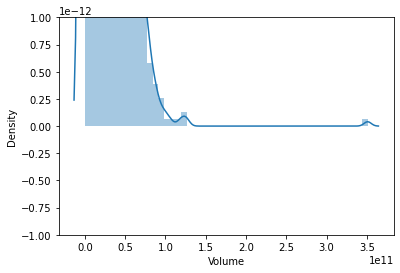

In [104]:
columns = ['Open','High','Low','Close','Adj Close','Volume']
for i in columns:
    plt.figure()
    sns.distplot(final_df[i])

<h2>Corelation matrix:

In [105]:
final_df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999489,0.998996,0.998719,0.998719,0.700858
High,0.999489,1.000000,0.998940,0.999432,0.999432,0.704807
Low,0.998996,0.998940,1.000000,0.999336,0.999336,0.692407
Close,0.998719,0.999432,0.999336,1.000000,1.000000,0.699617
Adj Close,0.998719,0.999432,0.999336,1.000000,1.000000,0.699617
Volume,0.700858,0.704807,0.692407,0.699617,0.699617,1.000000


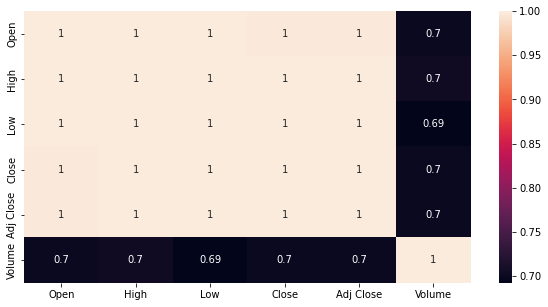

In [106]:
cor = final_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cor,annot=True)

<h3>Observation:

- as we seen above corelation matrix we see that all the variable with volume have less corelated than other.
- all other varible are highly corelated with  each other

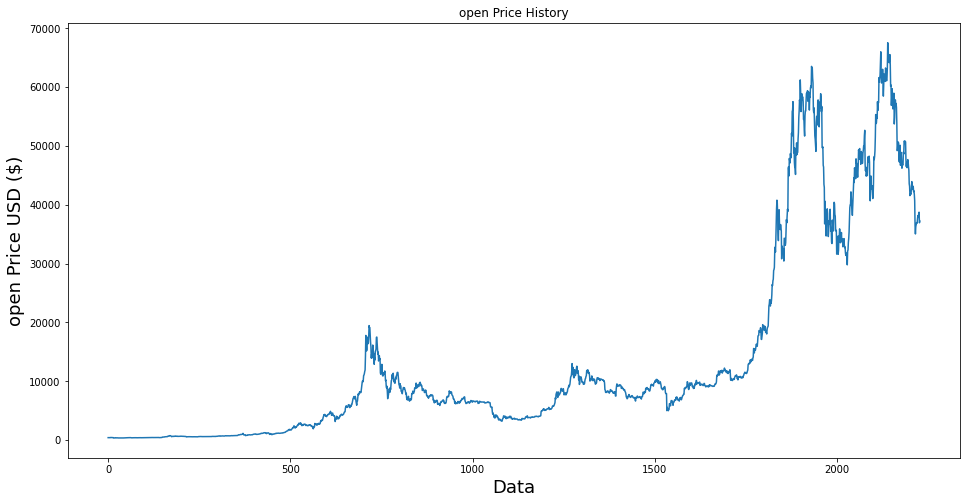

In [172]:
plt.figure(figsize=(16,8))
plt.title('open Price History')
plt.plot(final_df['Open'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('open Price USD ($)', fontsize=18)
plt.show()

<Figure size 216x216 with 0 Axes>

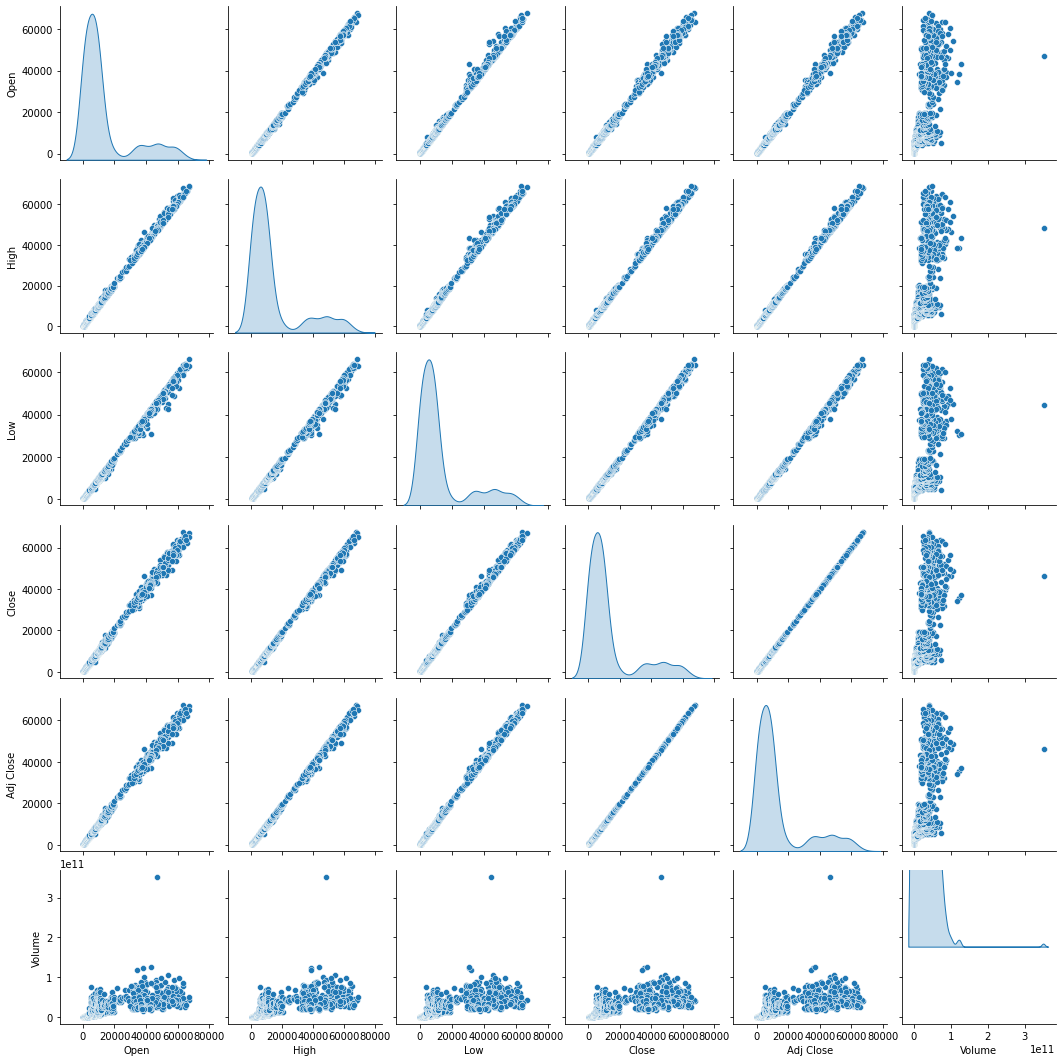

In [110]:
plt.figure(figsize=(3,3))
sns.pairplot(final_df,diag_kind='kde')
plt.show()

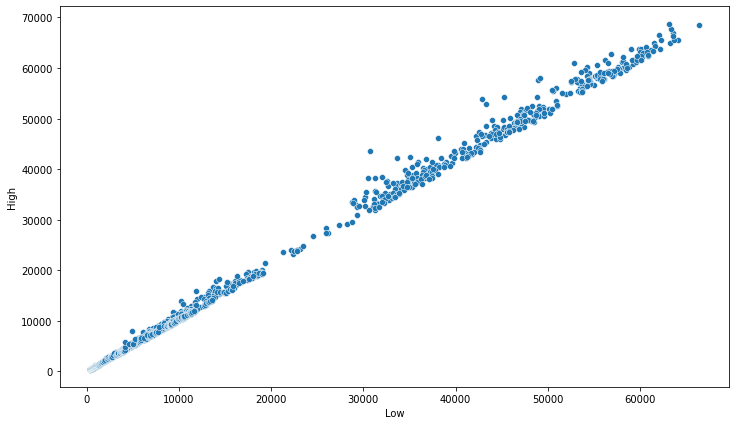

In [108]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Low',y='High',data=final_df)

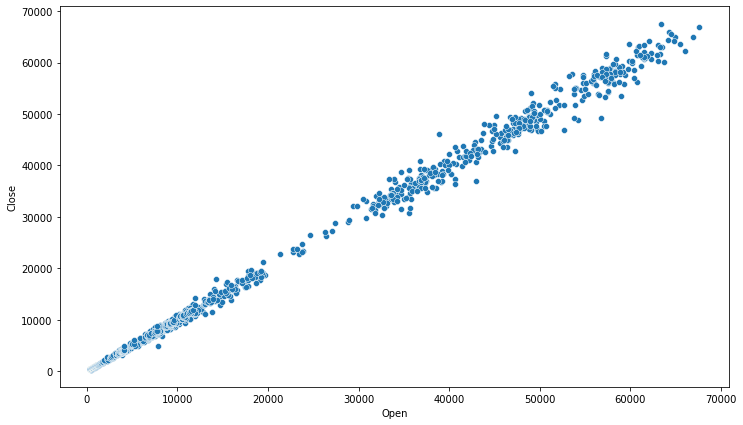

In [109]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Open',y='Close',data=final_df)

<h3> Feature engineering:

In [111]:
final_df['Mean_of_Numerical_column'] = final_df[['Open','Close','High','Low','Adj Close','Volume']].mean(axis=1)
final_df['Median_of_Numerical_column'] = final_df[['Open','Close','High','Low','Adj Close','Volume']].median(axis=1)
final_df['Std_dev_of_Numerical_column'] = final_df[['Open','Close','High','Low','Adj Close','Volume']].std(axis=1)

In [112]:
final_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Mean_of_Numerical_column,Median_of_Numerical_column,Std_dev_of_Numerical_column
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900,6.046844e+06,434.334015,1.481062e+07
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600,5.016462e+06,434.029999,1.228671e+07
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800,6.605992e+06,431.794495,1.618026e+07
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500,6.413277e+06,433.091003,1.570820e+07
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600,5.754127e+06,432.514496,1.409362e+07


In [113]:
#High low difference 
final_df['H-L']=final_df['High']-final_df['Low']
#stock close open difference
final_df['C-O']=final_df['Close']-final_df['Open']

In [114]:
final_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Mean_of_Numerical_column,Median_of_Numerical_column,Std_dev_of_Numerical_column,H-L,C-O
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900,6.046844e+06,434.334015,1.481062e+07,8.730987,3.613007
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600,5.016462e+06,434.029999,1.228671e+07,4.192017,-1.184021


In [116]:
final_df.Date = pd.to_datetime(final_df.Date, format="%Y-%m-%d")
final_df["month"] = final_df.Date.dt.month
final_df["day"] = final_df.Date.dt.day
final_df["day_of_week"] = final_df.Date.dt.dayofweek
final_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Mean_of_Numerical_column,Median_of_Numerical_column,Std_dev_of_Numerical_column,H-L,C-O,month,day,day_of_week
2223,2022-01-31,37920.281250,38647.261719,36733.574219,38483.125000,38483.125000,20734730465,3.455820e+09,38483.125000,8.464903e+09,1913.687500,562.843750,1,31,0
2224,2022-02-01,38481.765625,39115.132813,38113.664063,38743.273438,38743.273438,20288500328,3.381449e+09,38743.273438,8.282730e+09,1001.468750,261.507813,2,1,1
2225,2022-02-02,38743.714844,38834.617188,36832.730469,36952.984375,36952.984375,19155189416,3.192563e+09,37848.349610,7.820058e+09,2001.886719,-1790.730469,2,2,2
2226,2022-02-03,36944.804688,37154.601563,36375.539063,37154.601563,37154.601563,18591534769,3.098620e+09,37154.601563,7.589947e+09,779.062500,209.796875,2,3,3
2227,2022-02-04,37234.058594,38121.738281,37093.628906,37649.335938,37649.335938,20987750400,3.497990e+09,37649.335938,8.568198e+09,1028.109375,415.277344,2,4,4


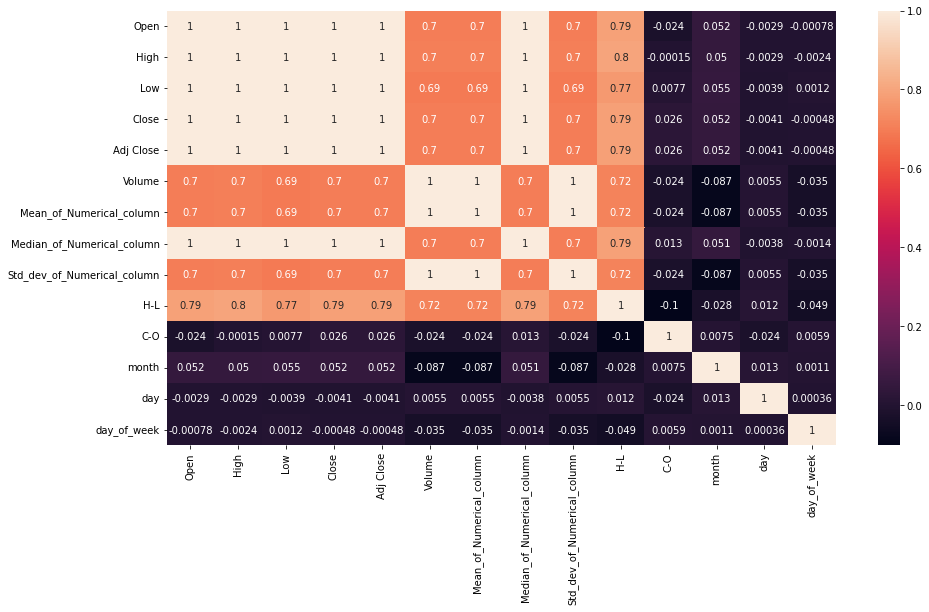

In [118]:
cor = final_df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(cor,annot=True)

In [120]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Mean_of_Numerical_column,Median_of_Numerical_column,Std_dev_of_Numerical_column,H-L,C-O,month,day,day_of_week
0,2016-01-01,-0.778092,-0.778484,-0.778645,-0.778706,-0.778706,-0.851742,-0.851742,-0.778929,-0.851741,-0.609028,-0.012898,1,1,4
1,2016-01-02,-0.777858,-0.778495,-0.778376,-0.778760,-0.778760,-0.852039,-0.852040,-0.778947,-0.852039,-0.612693,-0.018570,1,2,5
2,2016-01-03,-0.777921,-0.778630,-0.778819,-0.778965,-0.778965,-0.851580,-0.851581,-0.779080,-0.851580,-0.608781,-0.021387,1,3,6
3,2016-01-04,-0.778131,-0.778585,-0.778548,-0.778781,-0.778781,-0.851636,-0.851637,-0.779003,-0.851636,-0.611691,-0.013587,1,4,0
4,2016-01-05,-0.777951,-0.778604,-0.778512,-0.778848,-0.778848,-0.851826,-0.851827,-0.779037,-0.851826,-0.612440,-0.018481,1,5,1


In [158]:
#Create a new dataframe with only the 'open column'
data = final_df.filter(['Open'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

1782

In [159]:
from sklearn.preprocessing import MinMaxScaler
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00097713],
       [0.00103519],
       [0.00101965],
       ...,
       [0.57124113],
       [0.54446552],
       [0.54877088]])

In [160]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print

[array([9.77127943e-04, 1.03519181e-03, 1.01965246e-03, 9.67304228e-04,
       1.01207628e-03, 9.94021383e-04, 9.66559728e-04, 1.37628134e-03,
       1.31443690e-03, 1.23785708e-03, 1.24470375e-03, 1.23702356e-03,
       1.03583183e-03, 1.00045151e-03, 9.70191792e-04, 0.00000000e+00,
       3.28631708e-04, 2.47973327e-04, 3.26756175e-04, 2.18308639e-04,
       8.12075106e-04, 6.65003114e-04, 2.58407078e-04, 3.42771572e-04,
       5.54352545e-04, 4.00820893e-04, 4.07399568e-04, 4.47617021e-04,
       2.23786259e-04, 2.05284833e-04, 1.96771119e-04, 6.36604831e-05,
       1.16797716e-04, 1.42487851e-04, 7.59252617e-05, 3.54619812e-04,
       3.20251536e-04, 1.70291995e-04, 1.73908609e-04, 1.24284410e-04,
       1.64814375e-04, 2.53644443e-04, 2.17505108e-04, 2.91256852e-04,
       4.14663235e-04, 6.32510370e-04, 5.41180208e-04, 6.33820386e-04,
       7.66529025e-04, 8.58187149e-04, 8.41382748e-04, 1.08209241e-03,
       1.10019184e-03, 1.08926659e-03, 8.31782059e-04, 8.92524987e-04,
     

In [161]:
import numpy as np
#Convert the x_train & y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
#Reshape the Data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape[1]

60

In [162]:
tf.keras.backend.clear_session()
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(LSTM(units = 128, activation = 'relu',return_sequences=True, input_shape = (x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units = 64, input_shape = (x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [163]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 60, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


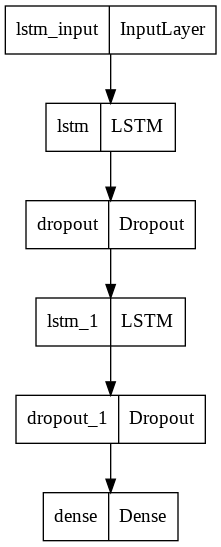

In [164]:
# model graphs
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True, 
    rankdir='TB', expand_nested=False, dpi=96
)

In [165]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
#Train the model
hist = model.fit(x_train, y_train, batch_size=64, epochs=20)

Epoch 1/20
27/27 [==============================] - 13s 236ms/step - loss: 0.0017
Epoch 2/20
27/27 [==============================] - 6s 242ms/step - loss: 2.6650e-04
Epoch 3/20
27/27 [==============================] - 8s 286ms/step - loss: 1.8696e-04
Epoch 4/20
27/27 [==============================] - 9s 345ms/step - loss: 1.7874e-04
Epoch 5/20
27/27 [==============================] - 11s 424ms/step - loss: 1.9319e-04
Epoch 6/20
27/27 [==============================] - 7s 264ms/step - loss: 1.7864e-04
Epoch 7/20
27/27 [==============================] - 5s 169ms/step - loss: 1.7186e-04
Epoch 8/20
27/27 [==============================] - 5s 179ms/step - loss: 1.5098e-04
Epoch 9/20
27/27 [==============================] - 5s 176ms/step - loss: 1.5841e-04
Epoch 10/20
27/27 [==============================] - 5s 172ms/step - loss: 1.3440e-04
Epoch 11/20
27/27 [==============================] - 5s 168ms/step - loss: 1.3933e-04
Epoch 12/20
27/27 [==============================] - 5s 171ms/ste

In [166]:
#Create the testing data set
#Create new array containing scaled values from index 1666 to 2166
test_data = scaled_data[training_data_len - 60:,:]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [167]:
#convert the data to a numpy array
x_test = np.array(x_test)
#Reshape data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [168]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
#Get the route mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

4238.801610906741

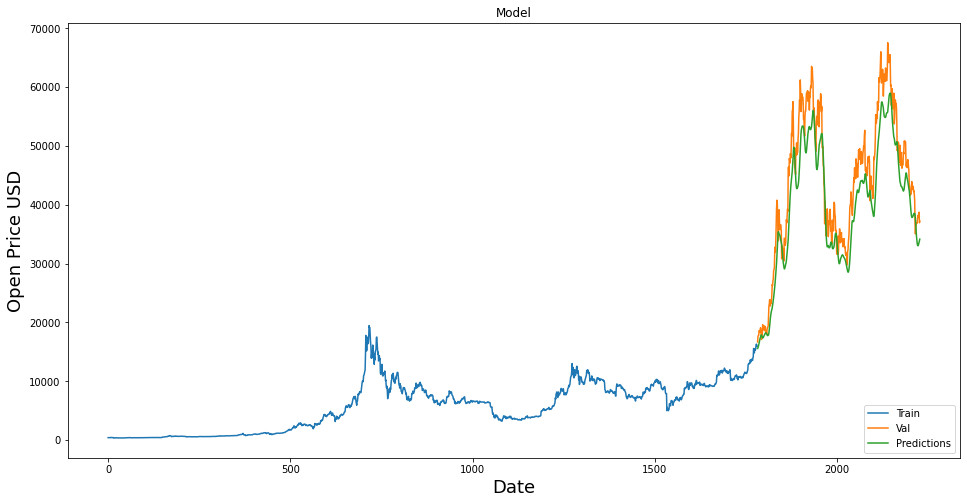

In [169]:
#plot data 
train = data[:training_data_len:]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD', fontsize=18)
plt.plot(train['Open'])
plt.plot(valid[['Open', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [170]:
#Show the Valid and Predicted Prices
valid

,Open,Predictions
1782,16685.691406,15591.635742
1783,17645.191406,15710.469727
1784,17803.861328,15923.135742
1785,17817.083984,16186.290039
1786,18621.316406,16455.156250
...,...,...
2223,37920.281250,33153.429688
2224,38481.765625,33353.511719
2225,38743.714844,33645.152344
2226,36944.804688,33992.007812


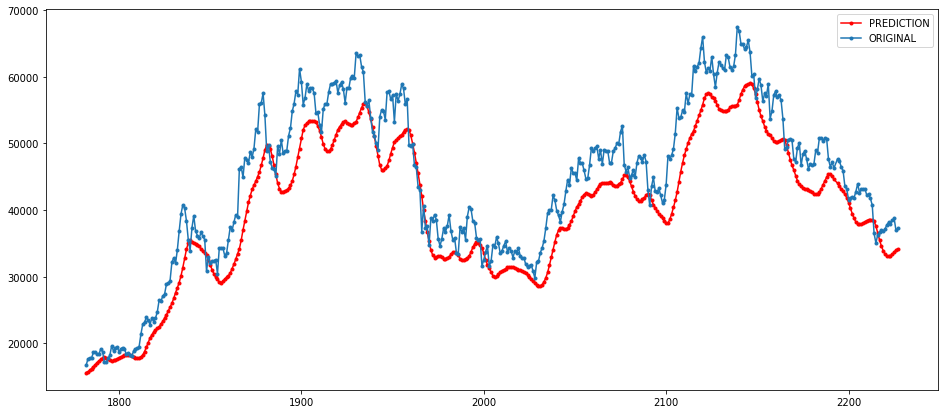

In [171]:
plt.figure(figsize=(16,7))
plt.plot(valid['Predictions'],"r-", marker='.', label='PREDICTION')
plt.plot(valid['Open'], marker='.', label='ORIGINAL')
plt.legend()
plt.show()

<h3>Observation:

- Above plot show us that how our model predict.
- As we seen it is not giving exact result but it look nearly the orignal value.
- Red curve indictaed the predicted where as blue curve indicated the orignal.
- Our model working well.